# Pythonによるモンテカルロ法入門
参考文献：http://aidiary.hatenablog.com/entry/20140620/1403272044

### 目次
一様乱数の生成、逆変換法、一般変換法、Box-Muller法、離散的な乱数の生成、混合分布からの乱数の生成、受理・棄却法、モンテカルロ積分、重点サンプリング


## 一様乱数の生成

 numpy.randomとscipy.statsのどちらを使おう

- 一様分布(uniform distributuion)
- 確率密度関数(pdf)

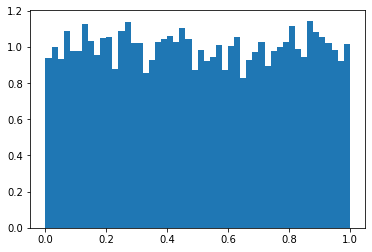

In [1]:
# 一様乱数の生成してヒストグラムを描画
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed()
N = 10000
x = np.random.uniform(0.0, 1.0, N)
nbins = 50

# Xに生成した乱数のリスト、nbinsにビンの数（ビンの幅）、density=Trueで積分が1になるように正規化して表示(連続分布のみに使える)
plt.hist(x, nbins, density=True) 
plt.show()

### scipy.stats
- scipyにはstatsには統計関数をまとめたモジュールがあります。各統計関数は，scipy.stats.hogeとしてアクセスできます。
- APIはすべての統計関数で共通です。
- 統計関数の例...正規分布、乱数確率変数、確率密度関数、累積分布関数、生存関数
- 参考文献：http://kaisk.hatenadiary.com/entry/2015/02/17/192955

In [2]:
#正規分布
from scipy.stats import norm  

In [3]:
#rvs (Random variates) 確率変数
x = norm.rvs(loc=0, scale=1, size=1) 
# 期待値loc，標準偏差scaleの正規分布に従う確率変数をsize個ランダムに取得します．

In [4]:
# pdf (Probability density function) 確率密度関数
norm.pdf(x=1.0, loc=0, scale=1)
# 期待値loc，標準偏差scaleの正規分布の確率密度関数のx=1.0での値を取得します．

0.24197072451914337

In [5]:
#cdf (Cumulative density function) 累積分布関数
norm.cdf(x=1.0, loc=0, scale=1)
# 期待値loc，標準偏差scaleの正規分布の累積分布関数のx=1.0での値を取得します．

0.8413447460685429

In [6]:
#sf (Survival function) 生存関数
norm.sf(x=1.0, loc=0, scale=1)
#期待値loc，標準偏差scaleの正規分布の生存関数のx=1.0での値を取得します． 生存関数sfは，1-cdf と同じです．

0.15865525393145707

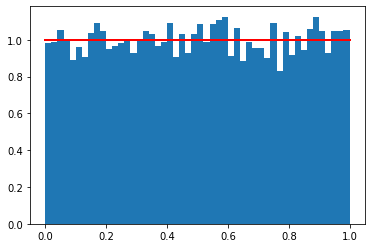

In [7]:
# 上と同じことをscipy.statsで実現
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

# 一様分布に従う確率分布からランダムサンプリング
np.random.seed()
N = 10000
# [0.0, 1.0]の一様分布に従う確率変数
rv = uniform(loc=0.0, scale=1.0)
# 一様分布からサンプリング
x = rv.rvs(size=N)
nbins = 50
plt.hist(x, nbins, density=True)

# 真のPDFを描画
x = np.linspace(rv.ppf(0), rv.ppf(1), 100)
plt.plot(x, uniform.pdf(x), 'r-', lw=2, label='uniform pdf')

plt.show()

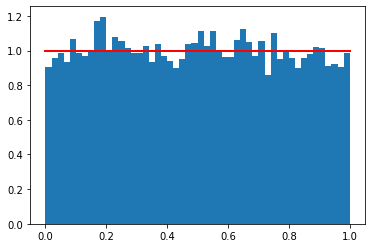

In [8]:
# 同じことをscipy.statsで実現
# 確率変数オブジェクトを使わないで
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

# 一様分布に従う確率分布からランダムサンプリング
np.random.seed()
N = 10000
loc = 0.0
scale = 1.0

# 一様分布からサンプリング
x = uniform.rvs(loc=loc, scale=scale, size=N)
nbins = 50
plt.hist(x, nbins, density=True)

# 真のPDFを描画
x = np.linspace(uniform.ppf(0, loc=loc, scale=scale), uniform.ppf(1, loc=loc, scale=scale), 100)
plt.plot(x, uniform.pdf(x, loc=loc, scale=scale), 'r-', lw=2, label='uniform pdf')

plt.show()

## 逆変換法

- 逆変換法（Inverse transform sampling)...[0,1]区間の一様分布から得られた乱数（一様乱数）を変換することで任意の確率分布に従う乱数を得る手法
- 累積分布関数（cumulative distribution function: cdf）
- 指数分布（exponential distribution）

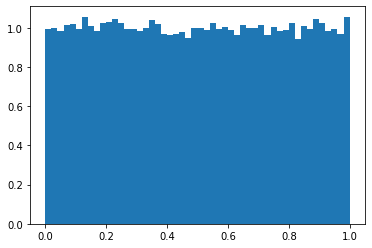

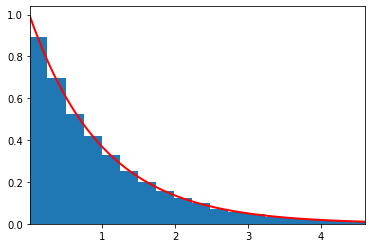

In [9]:
# 逆変換法で一様分布から指数分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

nbins = 50

# 指数分布のパラメータ（scale = 1/lambda）
scale = 1.0

# 逆変換法で一様乱数から指数分布の乱数を得る
np.random.seed()
N = 100000
U = scipy.stats.uniform(loc=0.0, scale=1.0).rvs(size=N)

# 指数分布の累積分布関数の逆関数を用いて変換
X1 = - scale * np.log(1 - U)

# 生成した元の一様乱数を描画
plt.figure(1)
plt.hist(U, nbins, density=True)

# 変換した指数分布の乱数と理想的なPDFを描画
plt.figure(2)
rv = scipy.stats.expon(scale=scale)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

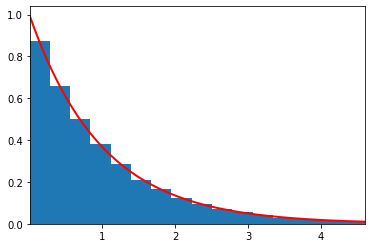

In [10]:
# scipyの乱数生成関数を利用した場合
plt.figure(3)
rv = scipy.stats.expon(scale=scale)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)

x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

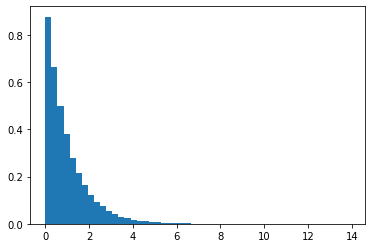

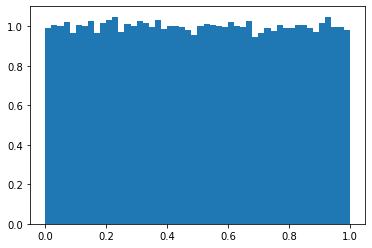

In [11]:
# 指数分布においてU=F(X)を確認
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# 指数分布に従うサンプルを生成
N = 100000
nbins = 50

plt. figure(1)
X = scipy.stats.expon(scale=1).rvs(size=N)
plt.hist(X, nbins, density=True)

# 指数分布の累積分布関数（cdf）で変換
plt. figure(2)
U = scipy.stats.expon.cdf(X)
plt.hist(U, nbins, density=True)

plt.show()

## 逆変換法（２）

一様乱数からロジスティック分布、コーシー分布に従う乱数を生成する

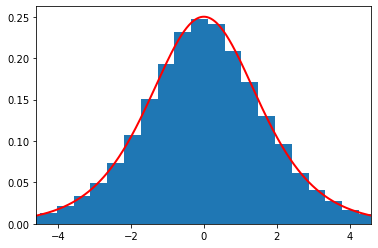

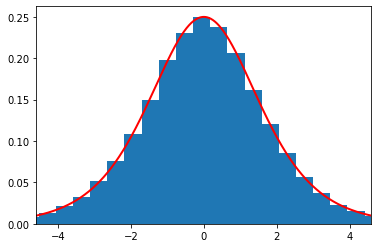

In [12]:
# 逆変換法で一様分布からロジスティック分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

nbins = 50

# ロジスティック分布のパラメータ
mu = 0
s = 1

# 逆変換法で一様分布からロジスティック分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# ロジスティック分布の累積分布関数の逆関数を用いて変換
X1 = mu + s * np.log(U / (1 - U))

# 変換したロジスティック分布と理想的なpdfを描画
plt.figure(1)
rv = scipy.stats.logistic(loc=mu, scale=s)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# numpyのロジスティック分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

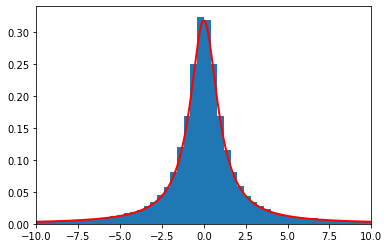

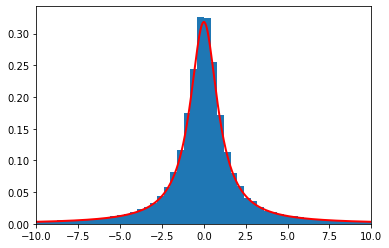

In [13]:
# 逆変換法で一様分布からコーシー分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

nbins = 50

# コーシー分布のパラメータ
x0 = 0
gamma = 1

# 逆変換法で一様分布からコーシー分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# コーシー分布の累積分布関数の逆関数を用いて変換
# コーシー分布は裾野が広く極端な値も出やすいためplotするときは
# それらのデータを切り捨てている
X1 = x0 + gamma * np.tan(np.pi * (U - 0.5))
X1 = X1[(X1>-10) & (X1<10)]

# 変換したコーシー分布と理想的なPDFを描画
plt.figure(1)
rv = scipy.stats.cauchy(loc=x0, scale=gamma)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((-10, 10))

# numpyのコーシー分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
X2 = X2[(X2>-10) & (X2<10)]
plt.hist(X2, nbins, density=True)
x = np.linspace(-10, 10, 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((-10, 10))

plt.show()

## 逆変換法（３）

一様乱数からガンマ分布、ベータ分布に従う乱数を生成する

1.0


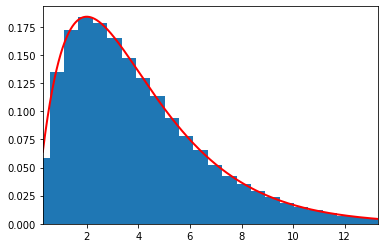

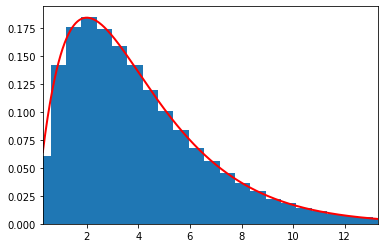

In [14]:
# 逆変換法で一様分布からガンマ分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special

nbins = 50

# ガンマ分布のパラメータ
k = 2.0
theta = 2.0

# 逆変換法で一様分布からガンマ分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# ガンマ分布の累積分布関数の逆関数を用いて変換
print(scipy.special.gamma(k))
X1 = theta * scipy.special.gammaincinv(k, U)

# 変換したガンマ分布と理想的なpdfを描画
plt.figure(1)
rv = scipy.stats.gamma(a=k, scale=theta)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# numpyのガンマ分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

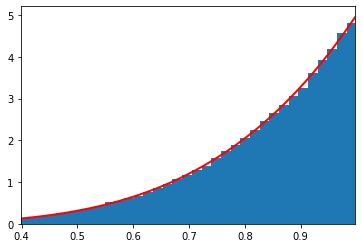

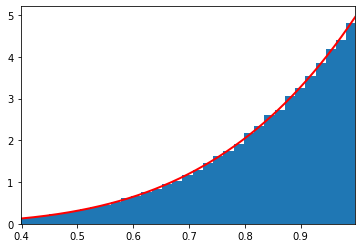

In [15]:
# 逆変換法で一様分布からベータ分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special

nbins = 50

# ベータ分布のパラメータ
alpha = 5
beta = 1

# 逆変換法で一様分布からガンマ分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# ベータ分布の累積分布関数の逆関数を用いて変換
X1 = scipy.special.betaincinv(alpha, beta, U)

# 変換したベータ分布と理想的なpdfを描画
plt.figure(1)
rv = scipy.stats.beta(a=alpha, b=beta)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# numpyのベータ分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

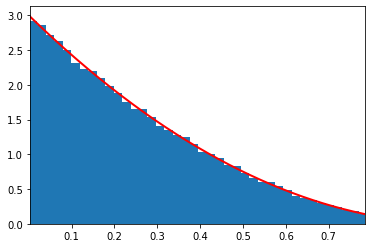

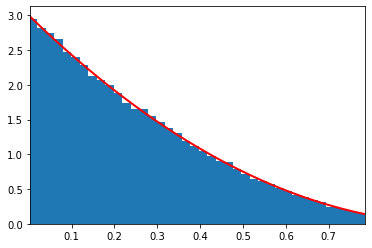

In [16]:
# 逆変換法で一様分布からベータ分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special

nbins = 50

# ベータ分布のパラメータ
alpha = 1
beta = 3

# 逆変換法で一様分布からガンマ分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# ベータ分布の累積分布関数の逆関数を用いて変換
X1 = scipy.special.betaincinv(alpha, beta, U)

# 変換したベータ分布と理想的なpdfを描画
plt.figure(1)
rv = scipy.stats.beta(a=alpha, b=beta)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# numpyのベータ分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

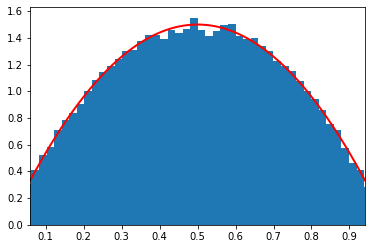

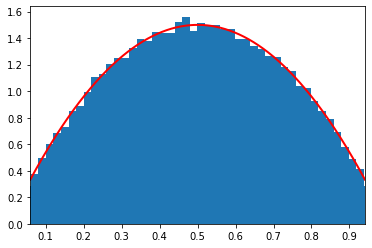

In [17]:
# 逆変換法で一様分布からベータ分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special

nbins = 50

# ベータ分布のパラメータ
alpha = 2
beta = 2

# 逆変換法で一様分布からガンマ分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# ベータ分布の累積分布関数の逆関数を用いて変換
X1 = scipy.special.betaincinv(alpha, beta, U)

# 変換したベータ分布と理想的なpdfを描画
plt.figure(1)
rv = scipy.stats.beta(a=alpha, b=beta)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# numpyのベータ分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

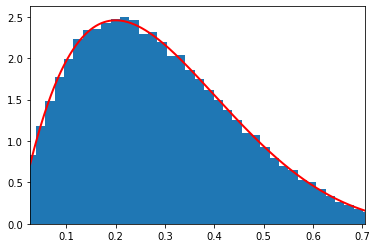

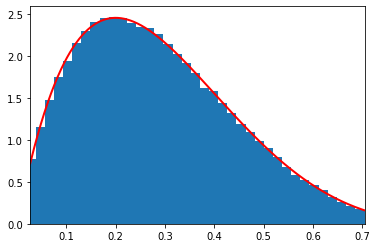

In [18]:
# 逆変換法で一様分布からベータ分布を得る
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special

nbins = 50

# ベータ分布のパラメータ
alpha = 2
beta = 5

# 逆変換法で一様分布からガンマ分布を得る
np.random.seed()
N = 100000
U = np.random.uniform(0.0, 1.0, N)

# ベータ分布の累積分布関数の逆関数を用いて変換
X1 = scipy.special.betaincinv(alpha, beta, U)

# 変換したベータ分布と理想的なpdfを描画
plt.figure(1)
rv = scipy.stats.beta(a=alpha, b=beta)
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# numpyのベータ分布に従う乱数生成関数を利用した場合
plt.figure(2)
X2 = rv.rvs(N)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

## 一般変換法

指数乱数からカイ二乗乱数、ガンマ乱数、ベータ乱数に変換

- 注意：rv.rvsに入れる変数はint型でないといけない

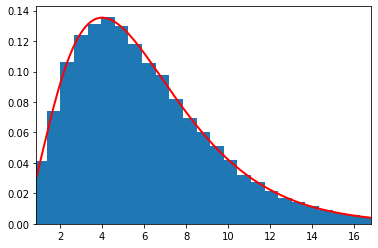

In [19]:
# カイ二乗分布に従う乱数を指数乱数から生成
import numpy as np
from scipy.stats import uniform, chi2
import matplotlib.pyplot as plt

nbins = 50

# カイ二乗分布のパラメータ（自由度: degrees of freedom）
# この方法では偶数のみ
df = 6
if df % 2 != 0:
    print (u"ERROR: 自由度は偶数のみ")
    exit(0)

nu = int(df / 2)

# 逆変換法で一様乱数を指数乱数に変換
# 1つのカイ二乗乱数を得るためにはnu個の指数乱数が必要なので
# 行列化して和を取りやすくする
np.random.seed()
N = 100000
rv = uniform(loc=0.0, scale=1.0)
U = rv.rvs(nu * N).reshape((nu, -1))
X = - np.log(1 - U)

# 指数乱数からカイ二乗乱数を得る
# 各列を足しあわせて1つのカイ二乗乱数を得る
Y = 2 * np.sum(X, axis=0)

# 変換したカイ二乗分布の乱数とpdfを描画
plt.figure(1)
plt.hist(Y, nbins, density=True)
rv = chi2(df=df)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()


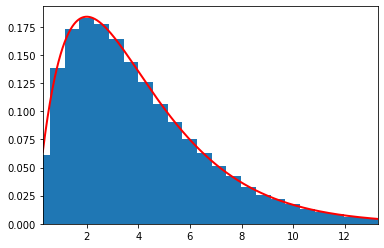

In [20]:
# ガンマ分布に従う乱数を指数乱数から生成
import numpy as np
from scipy.stats import uniform, gamma
import matplotlib.pyplot as plt

nbins = 50

# ガンマ分布のパラメータ
k = 2.0
theta = 2.0

# 逆変換法で一様乱数を指数乱数に変換
# 1つのガンマ乱数を得るためにはk個の指数乱数が必要なので
# 行列化して和を取りやすくする
np.random.seed()
N = 100000
rv = uniform(loc=0.0, scale=1.0)
U = rv.rvs(int(k) * N).reshape((int(k), -1))
X = - np.log(1 - U)

# 指数乱数からガンマ乱数を得る
# 各列を足しあわせて1つのガンマ乱数を得る
Y = theta * np.sum(X, axis=0)

# 変換したガンマ分布の乱数とpdfを描画
plt.figure(1)
plt.hist(Y, nbins, density=True)
rv = gamma(a=k, scale=theta)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

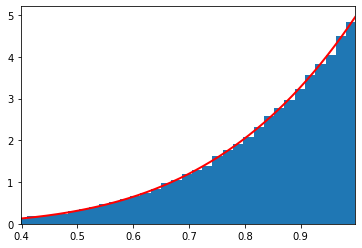

In [21]:
# ベータ分布に従う乱数を指数乱数から生成
import numpy as np
from scipy.stats import uniform, beta
import matplotlib.pyplot as plt

nbins = 50

# ベータ分布のパラメータ
a = 5.0
b = 1.0

# 逆変換法で一様乱数を指数乱数に変換
# 1つのガンマ乱数を得るためにはk個の指数乱数が必要なので
# 行列化して和を取りやすくする
np.random.seed()
N = 100000
rv = uniform(loc=0.0, scale=1.0)
U = rv.rvs(int(a+b) * N).reshape((int(a+b), -1))
X = - np.log(1 - U)

# 指数乱数からベータ乱数を得る
Y = np.sum(X[0:int(a),], axis=0) / np.sum(X, axis=0)

# 変換したベータ分布の乱数とpdfを描画
plt.figure(1)
plt.hist(Y, nbins, density=True)
rv = beta(a=a, b=b)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

## Box-Muller法
- 二つの一様乱数から二つの標準正規分布に従う乱数を生成
- 2つの一様乱数から標準正規分布 N(0, 1) に従う2つの乱数を生成するアルゴリズム。

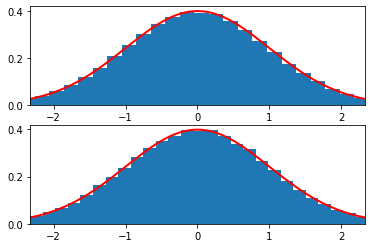

In [22]:
# Box-Mullerアルゴリズムを用いて標準正規分布N(0,1)に従う乱数を生成
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

# 独立した一様分布からそれぞれ一様乱数を生成
np.random.seed()
N = 100000
rv1 = uniform(loc=0.0, scale=1.0)
rv2 = uniform(loc=0.0, scale=1.0)
U1 = rv1.rvs(N)
U2 = rv2.rvs(N)

# Box-Mullerアルゴリズムで正規分布に従う乱数に変換
# 2つの一様分布から2つの標準正規分布が得られる
X1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
X2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)

# 変換した乱数の分布と標準正規分布の真のpdfを描画
rv = norm(loc=0, scale=1)

# X1の分布
plt.subplot(2, 1, 1)
nbins = 50
plt.hist(X1, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

# X2の分布
plt.subplot(2, 1, 2)
plt.hist(X2, nbins, density=True)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

確かにX1とX2の乱数は標準正規分布と一致していることが確認できました。

### 中心極限定理（CLT: Central Limit Theorem）
中心極限定理に基づく方法はBox-Muller法に比べて精度は落ちるけど高速

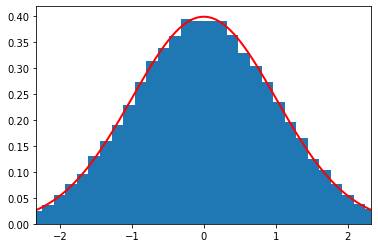

In [23]:
# 中心極限定理（CLT）による正規乱数生成器
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt

# 独立した一様分布からそれぞれ一様乱数を生成
np.random.seed()
N = 100000

# 12個の一様乱数を使用
K = 12

# (-0.5, 0.5)の一様乱数を生成
rv = uniform(loc=-0.5, scale=1.0)
U = rv.rvs(K * N).reshape((K, -1))

# K個の一様分布の和から正規分布を生成
Z = np.sum(U, axis=0)

# 変換した乱数の分布と標準正規分布の真のpdfを描画
plt.figure(1)
nbins = 50
plt.hist(Z, nbins, density=True)

rv = norm(loc=0, scale=1)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((rv.ppf(0.01), rv.ppf(0.99)))

plt.show()

## 離散的な乱数の生成
- 離散分布の例…ポアソン分布、二項分布

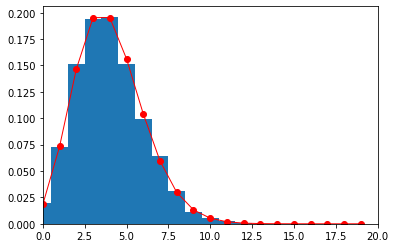

In [24]:
# ポアソン分布に従う乱数を累積分布関数から生成

import numpy as np
from scipy.stats import uniform, poisson
import matplotlib.pyplot as plt

# ポアソン分布のパラメータ
lam = 4

# この値まで確率値を計算
K = 20

# サンプリング数
N = 10000

rv = poisson(mu=lam)

# cdfの表を計算
t = np.arange(K)
prob = rv.cdf(t)

X = []
for i in range(N):
    u = uniform.rvs(loc=0, scale=1, size=1)
    # prob < uはcdfがuより小さいときTRUEを返す
    # TRUEは1と解釈されるのでsum()でTRUEの数をカウントして
    # インデックスを求めている
    X.append(np.sum(prob < u))

# ポアソン分布に従う乱数の分布を描画
# hist()のdensity=Trueはバーの積分が1になる確率密度関数になるため離散分布では使えない
# 離散分布ではバーの高さの合計が1になる確率質量関数にする必要がある
# http://stackoverflow.com/questions/3866520/plotting-histograms-whose-bar-heights-sum-to-1-in-matplotlib
plt.figure(1)

#連続分布と違う箇所！！
#離散分布の場合は積分が1になるのではなく、バーの高さの和が1になる
nbins = np.arange(-0.5, K, 1.0)
weights = np.ones_like(X) / float(len(X))
plt.hist(X, nbins, weights=weights)
plt.plot(t, rv.pmf(t), 'ro-', lw=1)
plt.xlim((0, K))

plt.show()

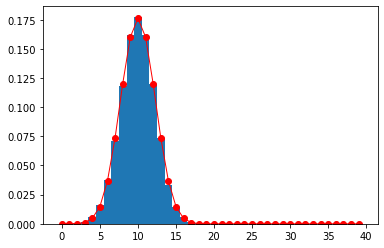

In [25]:
# 二項分布に従う乱数を累積分布関数から生成

import numpy as np
from scipy.stats import uniform, binom
import matplotlib.pyplot as plt

# 二項分布のパラメータ
n = 20
p = 0.5

# この値まで確率値を計算
K = 40

# サンプリング数
N = 10000

rv = binom(n=n, p=p)

# cdfの表を計算
t = np.arange(K)
prob = rv.cdf(t)

X = []
for i in range(N):
    u = uniform.rvs(loc=0, scale=1, size=1)
    # prob < uはcdfがuより小さいときTRUEを返す
    # TRUEは1と解釈されるのでsum()でTRUEの数をカウントして
    # インデックスを求めている
    X.append(np.sum(prob < u))

# 二項分布に従う乱数の分布を描画
# hist()のnormed=Trueはバーの積分が1になる確率密度関数になるため離散分布では使えない
# 離散分布ではバーの高さの合計が1になる確率質量関数にする必要がある
# http://stackoverflow.com/questions/3866520/plotting-histograms-whose-bar-heights-sum-to-1-in-matplotlib
plt.figure(1)
nbins = np.arange(-0.5, K, 1.0)
weights = np.ones_like(X) / float(len(X))
plt.hist(X, nbins, weights=weights)
plt.plot(t, rv.pmf(t), 'ro-', lw=1)

plt.show()

## 混合分布から乱数生成

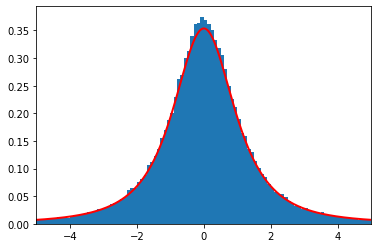

In [27]:
# スチューデントのt分布

# 混合分布によってカイ二乗乱数からスチューデントのt分布に従う乱数を生成
# X|y〜N(0, ν/y) && Y〜Xν^2 => X〜t(ν)
import numpy as np
from scipy.stats import chi2, norm, t
import matplotlib.pyplot as plt

# t分布のパラメータ
nu = 2

# サンプリング数
N = 100000

# カイ二乗分布に従う乱数を生成
Y = chi2(df=nu).rvs(size=N)

# 生成したカイ二乗分布の乱数をパラメータに持つ正規分布から乱数を生成
# scaleの次元数 = sizeとなっていないとエラーになる
# scaleの各値について1つの乱数を生成してくれる？
# nu=1のときに微妙に理論値とずれるがscipy.statsの乱数生成でも同じ結果なのでOK？
X = norm(loc=0, scale=np.sqrt(nu/Y)).rvs(size=N)

# 上の書き方の意図
# X = np.array([])
# for y in Y:
#     X = np.append(X, norm(loc=0, scale=np.sqrt(nu/y)).rvs(size=1))

# scipy.statsの乱数生成を使ったとき
# X = t(df=nu).rvs(N)

# t分布の裾野は広いので表示範囲を制限するため
X = X[(X>-5) & (X<5)]

plt.figure(1)
nbins = 100
plt.hist(X, nbins, density=True)
rv = t(df=nu)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 1000)
y = rv.pdf(x)
plt.plot(x, y, 'r-', lw=2)
plt.xlim((-5, 5))

plt.show()

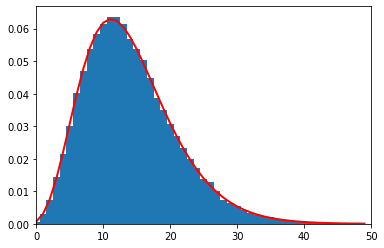

In [28]:
# 負の二項分布

# 混合分布によってガンマ乱数から負の二項分布に従う乱数を生成
# Y〜Gamma(n,(1-p)/p) && X|y〜Poisson(y) => X〜Neg(n,p)
import numpy as np
from scipy.stats import gamma, poisson, nbinom
import matplotlib.pyplot as plt

# 負の二項分布のパラメータ
n = 6
p = 0.3

# この値まで確率値を計算
K = 50

# サンプリング数
N = 100000

# ガンマ分布に従う乱数を生成
Y = gamma(a=n, scale=(1-p)/p).rvs(size=N)

# 生成したガンマ分布の乱数をパラメータに持つポアソン分布から乱数を生成
X = poisson(mu=Y).rvs(size=N)

# scipy.statsの機能で負の二項分布のパラメータ生成
# X = nbinom(n=n, p=p).rvs(N)

plt.figure(1)
weights = np.ones_like(X) / float(len(X))
nbins = np.arange(-0.5, K, 1.0)
plt.hist(X, nbins, weights=weights)
rv = nbinom(n=n, p=p)
t = np.arange(K)
plt.plot(t, rv.pmf(t), 'r-', lw=2)
plt.xlim((0, K))
plt.show()

## 受理・棄却法

- 受理・棄却法（acceptance-rejection method）、別名、棄却サンプリング（rejection sampling）
- 目標分布fと提案分布g
- 目標分布fにしたがう乱数を生成するのが最終目的だが、目標分布fの乱数は直接生成できないため代わりに提案分布gの乱数を生成し、ある条件を満たす場合だけ生成した乱数を目標分布fの乱数とみなす
- 提案分布に一様分布を使ったためサンプリングの効率が悪い

M = 2.669743994945347
サンプル数: 100000 => 37320
実際の受理率  : 0.373200
理論的な受理率: 0.374568


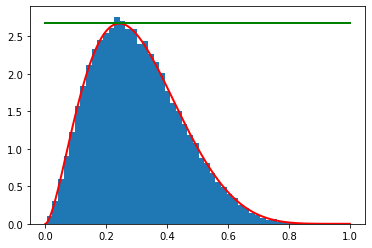

In [35]:
# ベータ乱数を受理・棄却法で生成
# 目標分布（ここではベータ分布）のpdfは既知とする
# 提案分布として一様分布を使用

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import uniform, beta

np.random.seed()

# 目標分布f
f = beta(a=2.7, b=6.3).pdf

# 提案分布g
# 提案分布から乱数生成するためにgvも保持
gv = uniform
g = gv.pdf

# 分布の上限を指定する定数Mを設定
# ベータ分布のpdfの上限値を指定すればベータ分布をすべて覆える
# 最大値を求めるためにベータ分布のpdfにマイナスをつけて
# 最小値問題に帰着させる
xopt = scipy.optimize.fmin(lambda x: -f(x), 0.0, disp=False)
M = f(xopt)[0]
print("M =", M)

# 受理・棄却法
Nsim = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# Yから受理の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print(u"サンプル数: %d => %d" % (len(Y), len(X)))
print(u"実際の受理率  : %f" % (len(X) / float(len(Y))))
print(u"理論的な受理率: %f" % (1.0 / M))

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布（一様分布）を描画
y = M * uniform.pdf(x)
plt.plot(x, y, 'g-', lw=2)

# 受理した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.show()

10万サンプル生成しているが、受理されるのは37320サンプルで受理率は37%にすぎない。

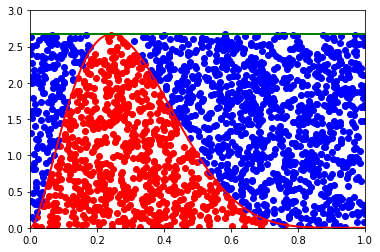

In [36]:
# 受理されたサンプルと棄却されたサンプルを描く
# 点の数が多すぎるのでNsimを小さくした

# 目標分布f
f = beta(a=2.7, b=6.3).pdf

# 提案分布g
# 提案分布から乱数生成するためにgvも保持
gv = uniform
g = gv.pdf

Nsim = 2000

# 候補密度からの乱数Yを生成
Y = uniform.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# 受理されたサンプルと、棄却されたサンプルのインデックスを計算
acceptedIdx = U <= f(Y) / (M * g(Y))
rejectedIdx = U > f(Y) / (M * g(Y))

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布を描画
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

# 受理されたサンプルを描画
plt.scatter(Y[acceptedIdx], U[acceptedIdx] * M * g(Y[acceptedIdx]), color="red")
plt.scatter(Y[rejectedIdx], U[rejectedIdx] * M * g(Y[rejectedIdx]), color="blue")

plt.xlim((0.0, 1.0))
plt.ylim((0.0, 3.0))

plt.show()

赤点が受理されたサンプル、青点が棄却されたサンプル。受理された赤点のサンプル数をヒストグラムで表すとさきに記したように目標分布にしたがって分布していることがわかる。

## 受理・棄却法（２）
- 前回は一様分布を使ったが、今回はより効率のよい提案分布gとしてベータ分布を使用する

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


xopt = [0.7]
M = [1.67180777]
サンプル数: 100000 => 59936
実際の受理率  : 0.599360
理論的な受理率: 0.598155


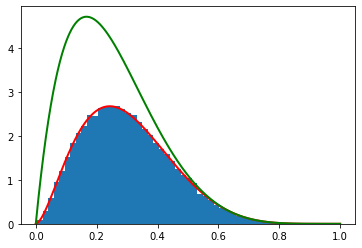

In [39]:
# 提案分布g = ベータ分布、目標分布f = ベータ分布

# ベータ乱数を受理・棄却法で生成
# 目標分布（ここではベータ分布）のpdfは既知とする
# 提案分布として目標のベータ分布を覆うベータ分布を使用

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import uniform, beta

np.random.seed()

# 目標分布f
f = beta(a=2.7, b=6.3).pdf

# 提案分布g
gv = beta(a=2.0, b=6.0)
g = gv.pdf

# 分布の上限を指定する定数Mを設定
# f(x)/g(x) <= Mを満たす必要がある

# f(x)/g(x)を最大化するxoptを求める
xopt = scipy.optimize.fmin(lambda x: - f(x) / g(x), 0.0, disp=False)
# そこでの値をMとする
M = f(xopt) / g(xopt)
print("xopt =", xopt)
print("M =", M)

# 受理・棄却法
Nsim = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# Yから受理の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print(u"サンプル数: %d => %d" % (len(Y), len(X))) 
print(u"実際の受理率  : %f" % (len(X) / float(len(Y))))
print(u"理論的な受理率: %f" % (1.0 / M))

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布（ベータ分布）を描画
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

# 受理した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.show()

- ベータ分布にしたがう乱数が生成できていることがわかる。
- 10万サンプル生成して59936サンプルが受理されているので受理率は60%となる。理論値の1/Mとも一致している。前回、提案分布に一様分布を使ったときの受理率は37%だったので少し改善している。

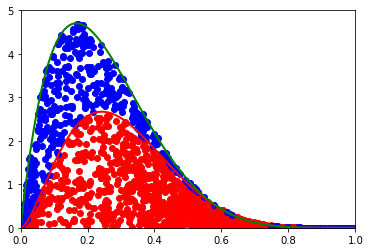

In [40]:
# 受理されたサンプルと棄却されたサンプルを描く
# 点の数が多すぎるのでNsimを小さくした

# 目標分布f
f = beta(a=2.7, b=6.3).pdf

# 提案分布g
gv = beta(a=2.0, b=6.0)
g = gv.pdf

Nsim = 2000

# 候補密度からの乱数Yを生成
Y = uniform.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# 受理されたサンプルと、棄却されたサンプルのインデックスを計算
acceptedIdx = U <= f(Y) / (M * g(Y))
rejectedIdx = U > f(Y) / (M * g(Y))

# 目標分布を描画
x = np.linspace(0.0, 1.0, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布を描画
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

# 受理されたサンプルを描画
plt.scatter(Y[acceptedIdx], U[acceptedIdx] * M * g(Y[acceptedIdx]), color="red")
plt.scatter(Y[rejectedIdx], U[rejectedIdx] * M * g(Y[rejectedIdx]), color="blue")

plt.xlim((0.0, 1.0))
plt.ylim((0.0, 5.0))

plt.show()

前回の一様分布の図と比べると青点が少ないことがよくわかる。

## 受理・棄却法（３）

- 二重指数分布（double exponential distribution) = ラプラス分布（Laplace distribution）
- ラプラス分布を提案分布として標準正規分布にしたがう乱数を生成

M = 1.315489246958914
サンプル数: 100000 => 76242
実際の受理率  : 0.762420
理論的な受理率: 0.760173


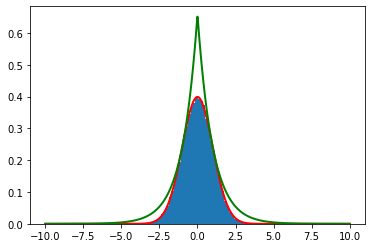

In [43]:
# 正規乱数を受理・棄却法で生成
# 提案分布としてラプラス分布（二重指数分布）を使用

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.stats import norm, laplace

np.random.seed()

# 目標分布f
f = norm(loc=0.0, scale=1.0).pdf

# 提案分布g
# scale = 1/alphaになる
# 練習問題2.8からもっとも効率がよいのがalpha=1なのでscale=1
gv = laplace(loc=0.0, scale=1.0)
g = gv.pdf

# 分布の上限を指定する定数Mを設定
# f(x)/g(x) <= Mを満たす必要がある
# 練習問題2.8から下式がもっとも効率のよいMとなる
alpha = 1.0
M = np.sqrt(2.0 / np.pi) * (1.0/alpha) * np.exp(alpha**2/2.0)
print("M =", M)

# 受理・棄却法
Nsim = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# Yから受理の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print(u"サンプル数: %d => %d" % (len(Y), len(X)))
print(u"実際の受理率  : %f" % (len(X) / float(len(Y))))
print(u"理論的な受理率: %f" % (1.0 / M))

# 目標分布を描画
x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布を描画
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

# 受理した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.show()

ラプラス分布（緑色の線）を提案分布として正規乱数（青色のヒストグラム）が生成されることが確認できた。正規乱数のヒストグラムは理想的な正規分布（赤色の線）と一致している。

## 受理・棄却法（４）

M = 1.8560697354710325
サンプル数: 100000 => 53863
実際の受理率  : 0.538630
理論的な受理率: 0.538773


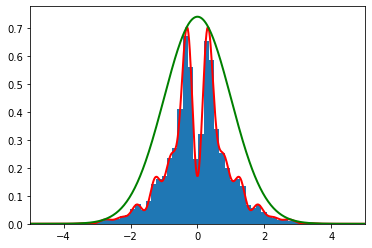

In [47]:
# 任意の確率分布にしたがう乱数を受理・棄却法で生成する

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.integrate
#from scipy.stats import norm
from scipy.stats import norm, uniform

np.random.seed()

# 正規化前の目標分布f
f = lambda x: np.exp(-x**2 / 2) * (np.sin(6*x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1)

# 正規化定数
#I = scipy.integrate.quad(f, -Inf, Inf)[0]
I = scipy.integrate.quad(f, -np.inf, np.inf)[0]

# 正規化済み（積分が1）の目標分布
f = lambda x: np.exp(-x**2 / 2) * (np.sin(6*x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1) / I

# 提案分布g
gv = norm(loc=0.0, scale=1.0)
g = gv.pdf

# 分布の上限を指定する定数Mを設定
xopt = scipy.optimize.fmin(lambda x: - f(x) / g(x), 0.0, disp=False)[0]
# そこでの値をMとする
M = f(xopt) / g(xopt)
print("M =", M)

# 受理・棄却法
Nsim = 100000

# 提案分布gからの乱数Yを生成
Y = gv.rvs(size=Nsim)

# 一様乱数UをNsim個生成
U = uniform.rvs(size=Nsim)

# Yから受理の条件を満たすサンプルXを残して残りを棄却
X = Y[U <= f(Y) / (M * g(Y))]
print(u"サンプル数: %d => %d" % (len(Y), len(X)))
print(u"実際の受理率  : %f" % (len(X) / float(len(Y))))
print(u"理論的な受理率: %f" % (1.0 / M))

# 目標分布を描画
x = np.linspace(-10, 10, 1000)
y = f(x)
plt.plot(x, y, 'r-', lw=2)

# 提案分布を描画
y = M * g(x)
plt.plot(x, y, 'g-', lw=2)

# 受理した乱数の分布を描画
plt.hist(X, bins=50, density=True)

plt.xlim((-5, 5))
plt.show()

赤色が目標分布f(x)。緑色が提案分布g(x)の正規分布。青色が受理されたサンプルのヒストグラム。ヒストグラムは赤色の理論値と一致していることがわかる。

## モンテカルロ積分
- モンテカルロ積分を使うと期待値を求める積分が乱数生成で簡単に計算できる。
- 期待値を求める積分は、統計や機械学習で頻繁に出てくる
- 確率分布から生成したサンプルの平均値で積分を近似する

scipy.integrate: 0.6666666666666666
モンテカルロ積分: 0.6691933041411621


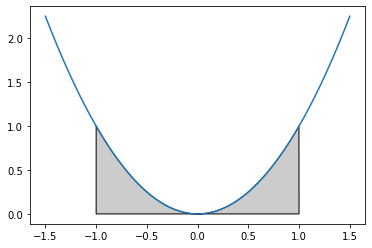

In [52]:
# 任意の関数 f(x) の [a, b] での積分をモンテカルロ法で求める
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import scipy.integrate

a, b = -1, 1
f = lambda x: x ** 2

# 被積分関数をプロット
x = np.linspace(-1.5, 1.5, 1000)
y = f(x)
plt.plot(x, y)

# 積分範囲を色付け
ix = np.arange(a, b, 0.001)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b,0)]
poly = plt.Polygon(verts, facecolor='0.8', edgecolor='k')
plt.gca().add_patch(poly)

# scipy.integrateで積分を計算
I = scipy.integrate.quad(f, a, b)[0]
print("scipy.integrate:", I)

# モンテカルロ積分
N = 100000
x = uniform(loc=a, scale=b-a).rvs(size=N)
I = (b - a) * np.mean(f(x))
print(u"モンテカルロ積分:", I)

- scipy.integrateに比べると少し近似精度が落ちるが積分が計算できていることがわかる。サンプル数Nを増やすと近似精度が増すこともわかる。
- 数値積分のアルゴリズムには、台形公式、シンプソン法、ガウス求積法などがある。
- 今回実験したような関数ではscipy.integrateの方が精度が高く、モンテカルロ積分を使う利点があまり感じられなかった。
- モンテカルロ積分は統計や機械学習で頻繁に扱う多重積分においてより効率的とのこと。

## モンテカルロ積分（２）

scipy.integrate: 0.9652009360501453
モンテカルロ積分: 0.9673576387681202


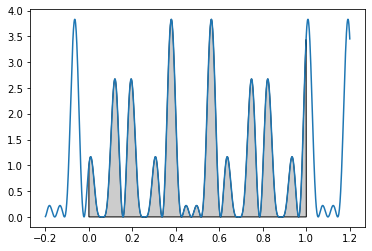

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import scipy.integrate

# 例3.3

a, b = 0, 1
f = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# 被積分関数をプロット
x = np.linspace(-0.2, 1.2, 1000)
y = f(x)
plt.plot(x, y)

# 積分範囲を色付け
ix = np.arange(a, b, 0.001)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b,0)]
poly = plt.Polygon(verts, facecolor='0.8', edgecolor='k')
plt.gca().add_patch(poly)
                
# scipy.integrateで積分を計算
I = scipy.integrate.quad(f, a, b)[0]
print("scipy.integrate:", I)

# モンテカルロ積分
N = 100000
x = uniform(loc=a, scale=b-a).rvs(size=N)
I = (b - a) * np.mean(f(x))
print(u"モンテカルロ積分:", I)

In [58]:
# 練習問題3.1 コーシー・ベイズ推定量をモンテカルロ積分で計算する
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm, uniform
import scipy.integrate

x = 4

# 分子の被積分関数
func1 = lambda t: t * norm(loc=x).pdf(t) * cauchy.pdf(t)

# 分母の被積分関数
func2 = lambda t: norm(loc=x).pdf(t) * cauchy.pdf(t)

# scipy.integrateで積分計算
I_nume = scipy.integrate.quad(func1, -np.Inf, np.Inf)[0]

I_denom = scipy.integrate.quad(func2, -np.Inf, np.Inf)[0]
I = I_nume / I_denom
print("scipy.integrate:", I)


# モンテカルロ積分 (1)
# pをコーシー分布、fを正規分布とした場合
# コーシー分布からサンプリングする

x = 4
N = 100000

# 分子の積分をモンテカルロ法で計算
T = cauchy.rvs(size=N)
I_nume = np.mean(T * norm(loc=x).pdf(T))

# 分母の積分をモンテカルロ法で計算
T = cauchy.rvs(size=N)
I_denom = np.mean(norm(loc=x).pdf(T))

I = I_nume / I_denom
print(u"モンテカルロ積分(1):", I)

# モンテカルロ積分 (2)
# pを正規分布、fをコーシー分布とした場合
# 正規分布からサンプリングする

# 分子
T = norm(loc=x).rvs(size=N)
I_nume = np.mean(T * cauchy.pdf(T))

# 分母
T = norm(loc=x).rvs(size=N)
I_denom = np.mean(cauchy.pdf(T))

I = I_nume / I_denom
print(u"モンテカルロ積分(2):", I)

scipy.integrate: 3.435061555229311
モンテカルロ積分(1): 3.449788210120523
モンテカルロ積分(2): 3.426697495259655


正規分布の方がscipy.integrateの結果に近いことが多いようだ。コーシー分布は正規分布より裾野が広いため平均から外れたとんでもないサンプルが出てしまうことがあるからかな？特にサンプリング数Nが小さいときに違いが出てくる。

## モンテカルロ積分の収束テスト

- 正規・コーシー-ベイズ推定量の積分のサンプリング方法...コーシー分布からサンプリングする場合, 正規分布からサンプリングする場合

scipy.integrate: 0.9652009360501453


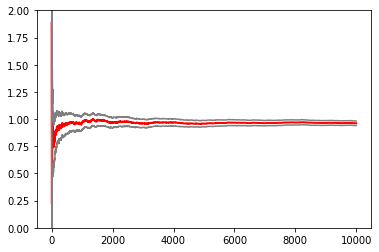

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import scipy.integrate

# モンテカルロ積分の収束テスト
# 例3.3の場合

N = 10000

a, b = 0, 1
h = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# scipy.integrateで積分を計算
I = scipy.integrate.quad(h, a, b)[0]
print("scipy.integrate:", I)

# モンテカルロ積分の収束テスト
x = h(uniform(loc=a, scale=b-a).rvs(size=N))

# サンプル数1のh_1からサンプル数Nのh_Nまで推定値をまとめて求める
estint = np.cumsum(x) / np.arange(1, N + 1)

# サンプル数1のsqrt(v_1)からサンプル数Nのsqrt(v_N)まで標準偏差をまとめて求める
esterr = np.sqrt(np.cumsum((x - estint) ** 2)) / np.arange(1, N + 1) #全サンプル生成後に各 m サンプルまでの和をcumsum()で求める

plt.plot(estint, color='red', linewidth=2)
plt.plot(estint + 2 * esterr, color='gray')
plt.plot(estint - 2 * esterr, color='gray')
plt.ylim((0, 2))
plt.show()

scipy.integrate: 3.435061555229311


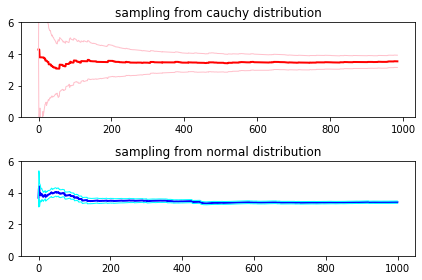

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm, uniform
import scipy.integrate

# モンテカルロ積分の収束テスト
# 練習問題3.1

N = 1000
x = 4

# scipy.integrateでの積分
h1 = lambda t: t * norm(loc=x).pdf(t) * cauchy.pdf(t)
h2 = lambda t: norm(loc=x).pdf(t) * cauchy.pdf(t)
num = scipy.integrate.quad(h1, -np.Inf, np.Inf)[0]
den = scipy.integrate.quad(h2, -np.Inf, np.Inf)[0]
I = num / den
print("scipy.integrate:", I)

# (1) コーシー分布からサンプリングするモンテカルロ積分の収束テスト
# 分子も分母も同じサンプルを使用すると仮定
theta = cauchy.rvs(size=N)
num = theta * norm(loc=x).pdf(theta)
den = norm(loc=x).pdf(theta)

# 分母に0がくるサンプルを削除
num = num[den != 0]
den = den[den != 0]
Ndash = len(num)

y = num / den
estInt = (np.cumsum(num) / np.arange(1, Ndash + 1)) / (np.cumsum(den) / np.arange(1, Ndash + 1))
esterr = np.sqrt(np.cumsum((y - estInt) ** 2)) / np.arange(1, Ndash + 1)

plt.subplot(2, 1, 1)
plt.plot(estInt, color='red', linewidth=2)
plt.plot(estInt + 2 * esterr, color='pink', linewidth=1)
plt.plot(estInt - 2 * esterr, color='pink', linewidth=1)
plt.title('sampling from cauchy distribution')
plt.ylim((0, 6))

# (2) 正規分布からサンプリングするモンテカルロ積分の収束テスト
theta = norm(loc=x).rvs(size=N)
num = theta * cauchy.pdf(theta)
den = cauchy.pdf(theta)

num = num[den != 0]
den = den[den != 0]
Ndash = len(num)

y = num / den
estInt = (np.cumsum(num) / np.arange(1, Ndash + 1)) / (np.cumsum(den) / np.arange(1, Ndash + 1))
esterr = np.sqrt(np.cumsum((y - estInt) ** 2)) / np.arange(1, Ndash + 1)

plt.subplot(2, 1, 2)
plt.plot(estInt, color='blue', linewidth=2)
plt.plot(estInt + 2 * esterr, color='cyan', linewidth=1)
plt.plot(estInt - 2 * esterr, color='cyan', linewidth=1)
plt.title('sampling from normal distribution')
plt.ylim((0, 6))

plt.tight_layout()
plt.show()

(上)コーシー分布からサンプリングした場合…コーシー分布は正規分布に比べて裾野が広いため平均から遠く離れた極端なサンプルが生成されやすい⇒収束の遅さの原因？？<br/>
(下)正規分布からサンプリングした場合…正規分布からサンプリングした方が収束が早いし、分散も小さいのがわかる

## 重点サンプリング（１）
- 通常のモンテカルロ積分ではうまくいかないケースがある

## 重点サンプリング（２）
- 重点サンプリングだと正しく計算できる
- 重点関数 g(x), 重要度重み（importance weight）

scipy.integrate: 2.8665157035203983e-07 2.866527562360824e-07
normal monte carlo integration: 0.0
importance sampling: 2.5549453521692774e-07


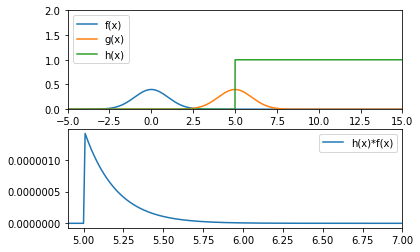

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import norm

# 単純な重点サンプリングの例

a = 5.0

# 被積分関数
f = norm.pdf
h = lambda x: x > a
y = lambda x: h(x) * f(x)

# scipy.integrateでの積分
I1 = scipy.integrate.quad(f, a, np.inf)[0]
I2 = scipy.integrate.quad(y, -np.inf, np.inf)[0]
print("scipy.integrate:", I1, I2)

N = 1000

# 普通のモンテカルロ積分の場合
# サンプルxを青色の標準正規分布N(x|0,1)から生成しているため
# ほとんどのサンプルが5より小さい範囲からしか生成されない
# つまり、h(x)が0となってしまう
x = norm.rvs(size=N)
I = np.mean(h(x))
print("normal monte carlo integration:", I)

# 重点サンプリングの場合
# 重点関数g(x)として平均が5にくる正規分布N(x|5,1)を使う
g = norm(loc=5, scale=1).pdf
x = norm(loc=5, scale=1).rvs(size=N)
I = np.mean(f(x) / g(x) * h(x))
print("importance sampling:", I)

# グラフ描画
plt.subplot(211)
ix = np.arange(-5, 15, 0.01)
plt.plot(ix, f(ix), label="f(x)")
plt.plot(ix, g(ix), label="g(x)")
plt.plot(ix, h(ix), label="h(x)")
plt.xlim((-5, 15))
plt.ylim((0, 2))
plt.legend(loc="best")

# 被積分関数yの値がある部分をズームインして表示
plt.subplot(212)
plt.plot(ix, y(ix), label="h(x)*f(x)")
plt.xlim((4.9, 7))
plt.legend(loc="best")
plt.show()

普通のモンテカルロ積分では、積分が0になってしまうが、重点サンプリングを使うと2.96394e-07となり、scipy.integrateの結果と比較的近いことが確認できる。

## 重点サンプリング（３）
-  重点関数をいろいろ変えて収束性を判定

## 重点サンプリング（５）
- 切断指数分布（truncated exponential distribution)...指数分布から4.5以上の区間を取り出してきて、その区間の面積が1になるように再調整した分布